Primeras filas del conjunto de datos:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Estadísticas descriptivas del conjunto de datos:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+

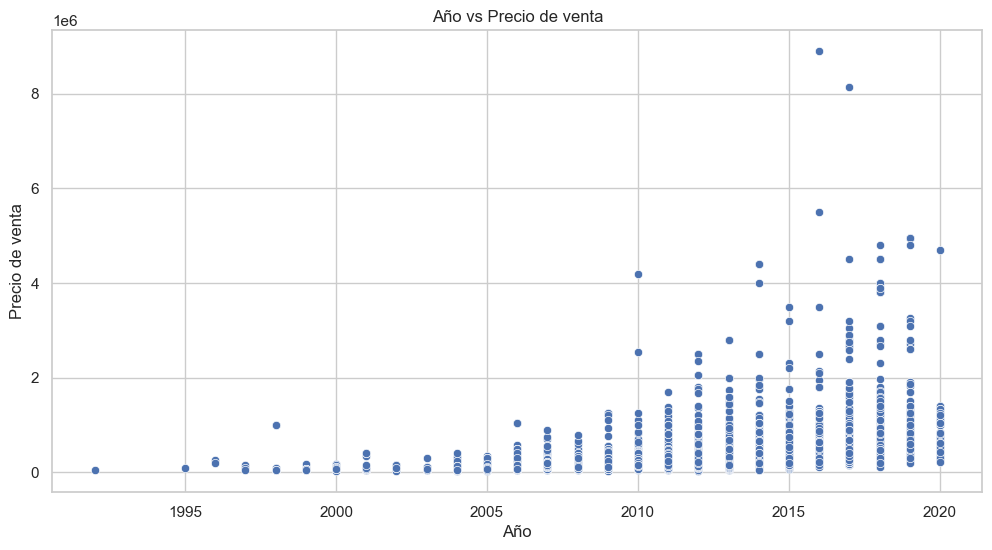

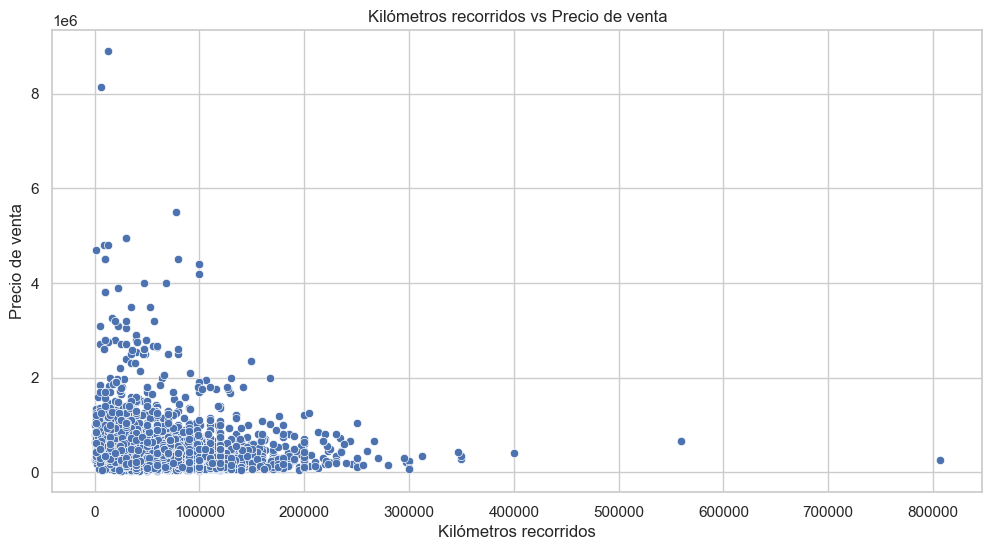

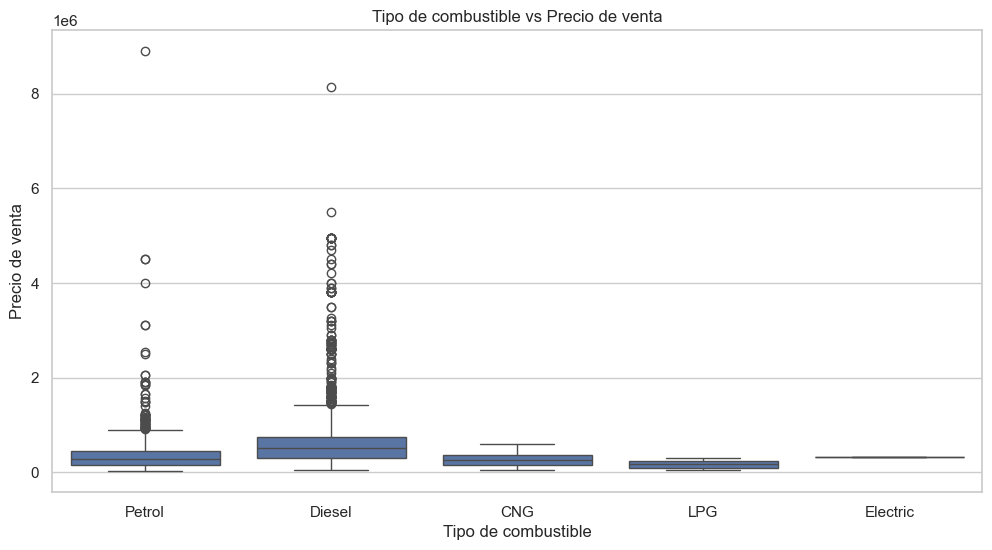

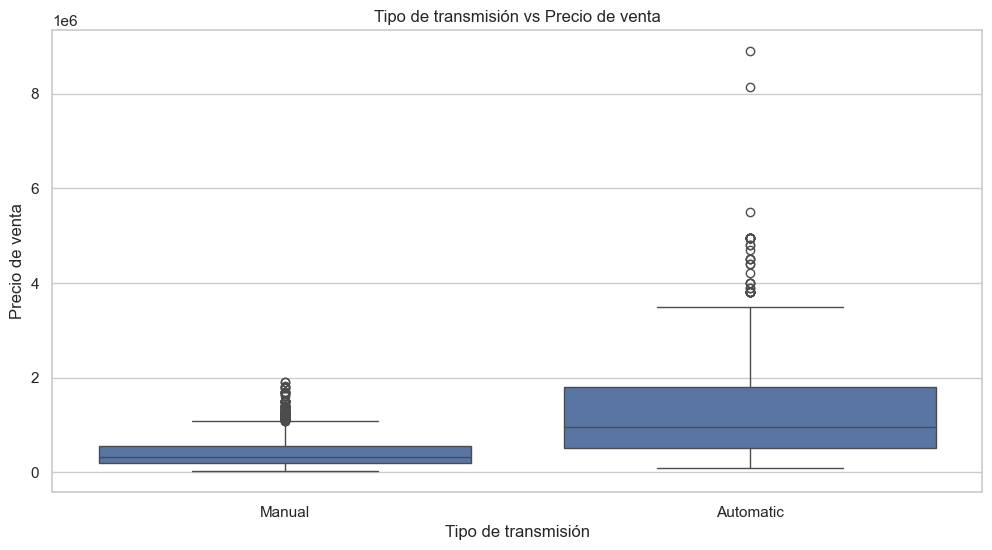

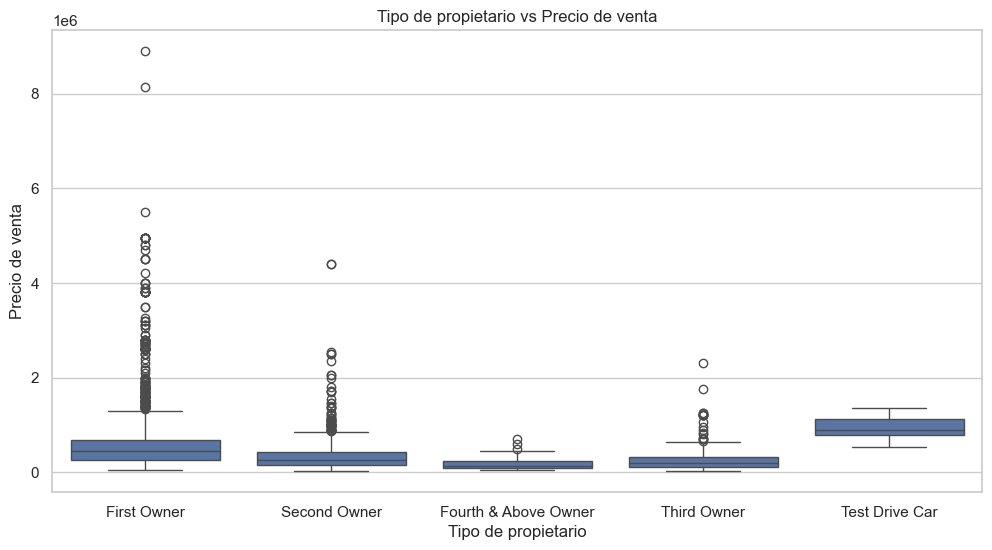

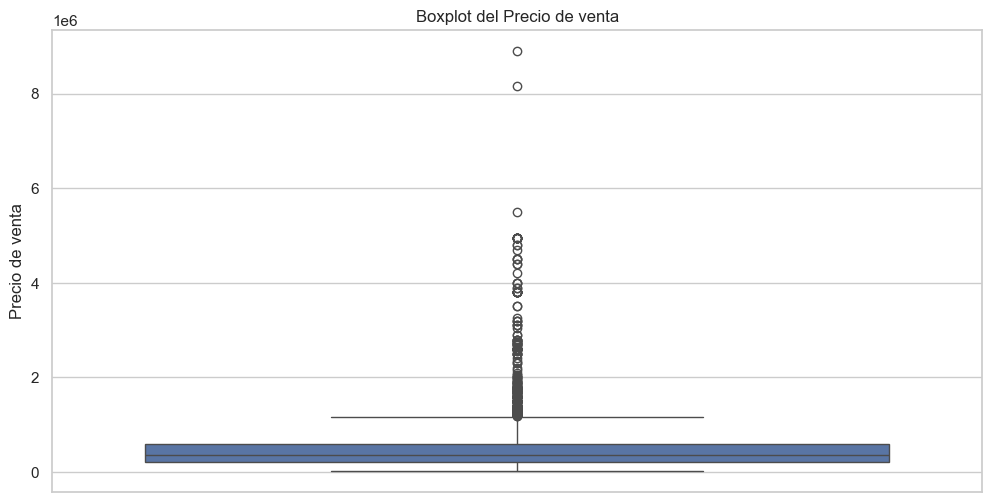

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv')

# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head())

# Mostrar estadísticas descriptivas del conjunto de datos
print("\nEstadísticas descriptivas del conjunto de datos:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes en el conjunto de datos:")
print(df.isnull().sum())

# Graficar relaciones entre variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Año vs Precio de venta')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Kilómetros recorridos vs Precio de venta')
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Tipo de combustible vs Precio de venta')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio de venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Tipo de transmisión vs Precio de venta')
plt.xlabel('Tipo de transmisión')
plt.ylabel('Precio de venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Tipo de propietario vs Precio de venta')
plt.xlabel('Tipo de propietario')
plt.ylabel('Precio de venta')
plt.show()

# Verificar valores atípicos en el precio de venta
plt.figure(figsize=(12, 6))
sns.boxplot(y='selling_price', data=df)
plt.title('Boxplot del Precio de venta')
plt.ylabel('Precio de venta')
plt.show()

In [57]:

# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head())

# Mostrar estadísticas descriptivas del conjunto de datos
print("\nEstadísticas descriptivas del conjunto de datos:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes en el conjunto de datos:")
print(df.isnull().sum())

# Eliminar filas con valores faltantes (si hay)
df_cleaned = df.dropna()

# Convertir variables categóricas a numéricas usando codificación one-hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Mostrar las primeras filas del conjunto de datos limpio
print("\nPrimeras filas del conjunto de datos limpio:")
print(df_cleaned.head())

# Guardar el conjunto de datos limpio en un nuevo archivo CSV
df_cleaned.to_csv('cleaned_car_details.csv', index=False)

print("\nEl conjunto de datos limpio se ha guardado en 'cleaned_car_details.csv'.")

Primeras filas del conjunto de datos:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Estadísticas descriptivas del conjunto de datos:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+

In [66]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el conjunto de datos
df = pd.read_csv('C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv')

# Eliminar filas con valores faltantes (si hay)
df_cleaned = df.dropna()

# Convertir variables categóricas a numéricas usando codificación one-hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Definir las características (X) y el objetivo (y)
X = df_cleaned.drop(columns=['name', 'selling_price'])
y = df_cleaned['selling_price']

# Aplicar SelectKBest para seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)

# Obtener las columnas seleccionadas por SelectKBest
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas para entrenar el modelo:")
print(selected_features)


Características seleccionadas para entrenar el modelo:
Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Third Owner'],
      dtype='object')


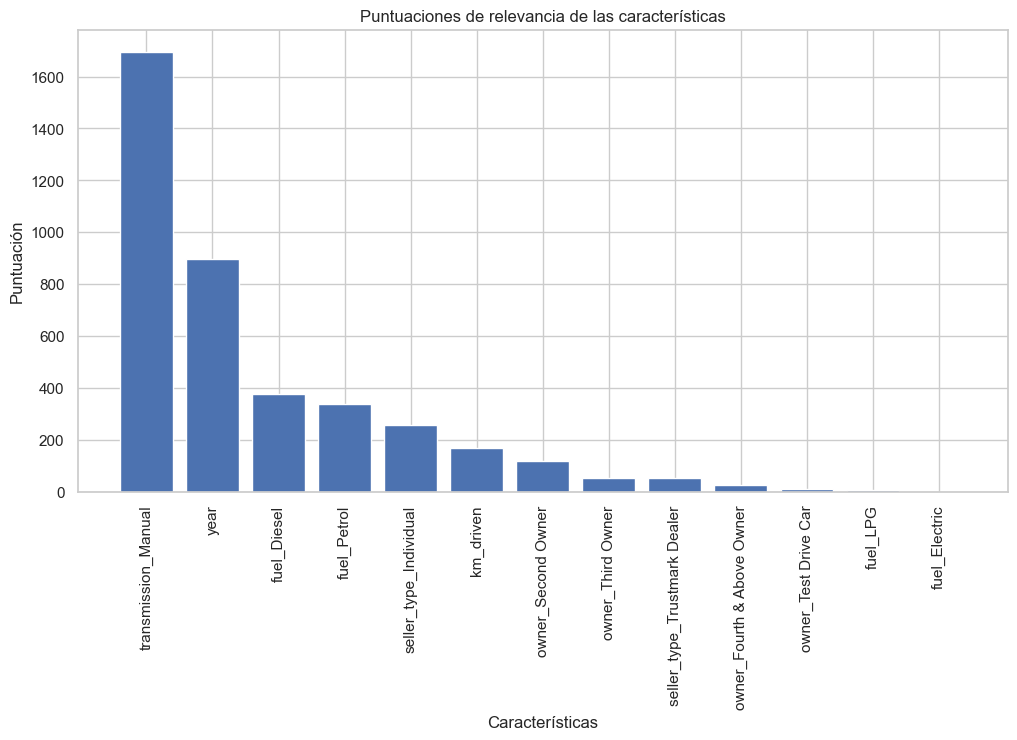

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el conjunto de datos desde la ruta especificada
df = pd.read_csv('C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv')

# Eliminar filas con valores faltantes (si hay)
df_cleaned = df.dropna()

# Convertir variables categóricas a numéricas usando codificación one-hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Definir las características (X) y el objetivo (y)
X = df_cleaned.drop(columns=['name', 'selling_price'])
y = df_cleaned['selling_price']

# Aplicar SelectKBest para seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)

# Obtener las puntuaciones para cada característica
feature_scores = selector.scores_

# Crear un DataFrame para las puntuaciones de las características
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Ordenar el DataFrame por puntuación en orden descendente
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Graficar un gráfico de barras para las puntuaciones de las características
plt.figure(figsize=(12, 6))
plt.bar(feature_scores_df['Feature'], feature_scores_df['Score'])
plt.title('Puntuaciones de relevancia de las características')
plt.xlabel('Características')
plt.ylabel('Puntuación')
plt.xticks(rotation=90)
plt.show()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos desde la ruta especificada
df = pd.read_csv('C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv')

# Eliminar filas con valores faltantes (si hay)
df_cleaned = df.dropna()

# Convertir variables categóricas a numéricas usando codificación one-hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Definir las características (X) y el objetivo (y)
X = df_cleaned.drop(columns=['name', 'selling_price'])
y = df_cleaned['selling_price']

# Dividir el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjuntos de Train y Test creados exitosamente.")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Conjuntos de Train y Test creados exitosamente.
Tamaño del conjunto de entrenamiento: 3472 muestras
Tamaño del conjunto de prueba: 868 muestras


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos desde la ruta especificada
df = pd.read_csv('C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv')

# Eliminar filas con valores faltantes (si hay)
df_cleaned = df.dropna()

# Convertir variables categóricas a numéricas usando codificación one-hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Definir las características (X) y el objetivo (y)
X = df_cleaned.drop(columns=['name', 'selling_price'])
y = df_cleaned['selling_price']

# Dividir el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Inicializar el modelo de regresión lineal con hiperparámetros por defecto
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo entrenado exitosamente.")
print(f"Error cuadrático medio: {mse}")
print(f"R-cuadrado: {r2}")

Modelo entrenado exitosamente.
Error cuadrático medio: 182146878750.2813
R-cuadrado: 0.4031303601432106


In [78]:
X_test.head(10)

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3978,2010,80000,1,0,0,0,1,0,1,0,0,0,0
1448,2019,27000,0,0,0,1,1,0,1,0,0,0,0
2664,2008,41723,0,0,0,1,1,0,1,0,1,0,0
17,2014,141000,1,0,0,0,1,0,1,0,1,0,0
1634,2016,60000,1,0,0,0,1,0,0,0,1,0,0
881,2012,19077,0,0,0,1,1,0,1,0,1,0,0
134,2015,14272,0,0,0,1,0,0,1,0,0,0,0
2338,2013,25000,0,0,0,1,1,0,1,0,1,0,0
1992,2016,40000,1,0,0,0,1,0,1,0,1,0,0
2886,2012,42000,0,0,0,1,0,0,1,0,0,0,0


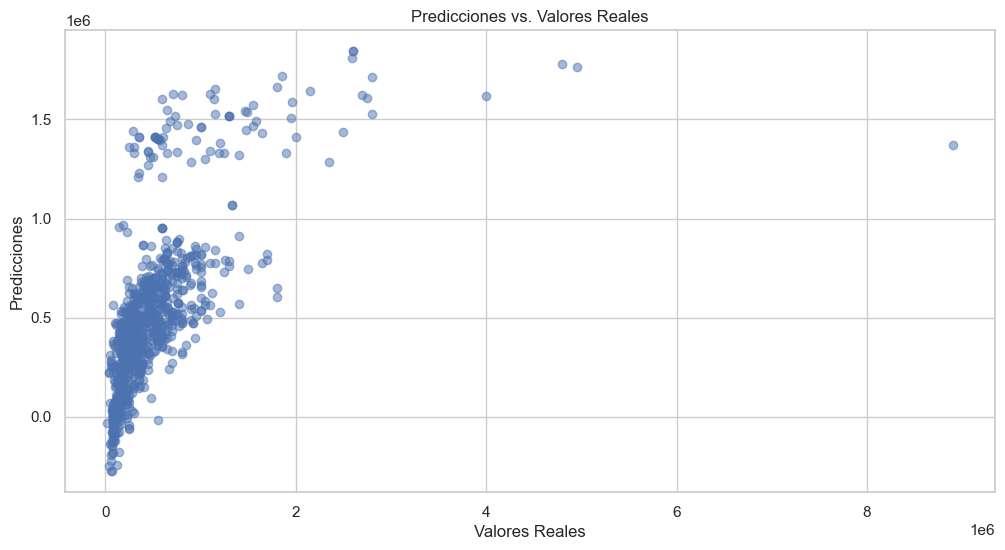

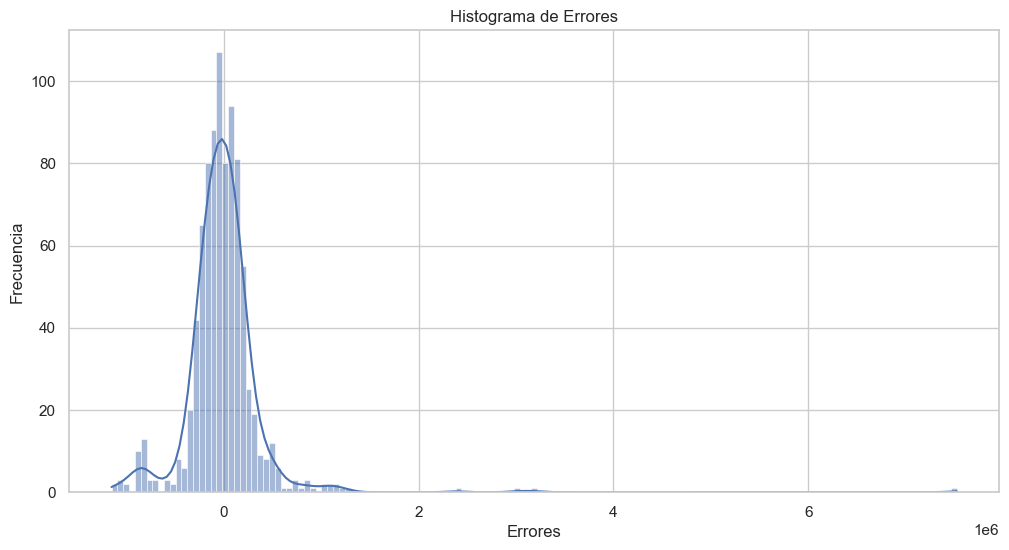

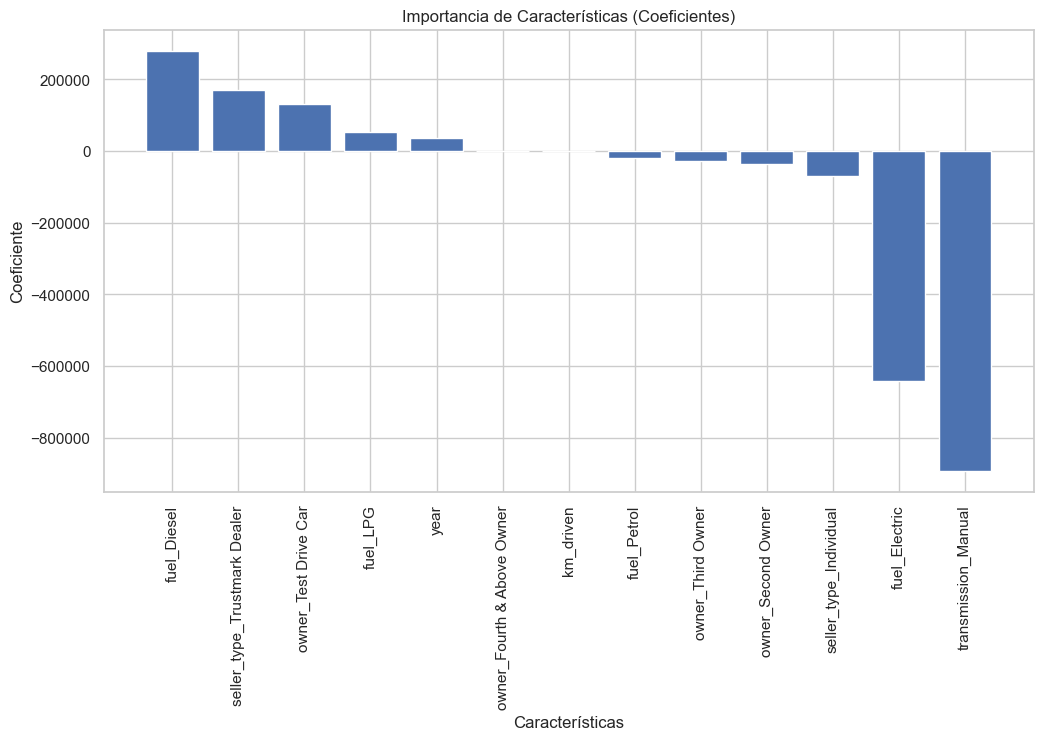

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Graficar los resultados

# Gráfica de dispersión de valores reales vs predichos
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Histograma de errores
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

# Gráfica de importancia de características (coeficientes)
coefficients = model.coef_
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Importancia de Características (Coeficientes)')
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.xticks(rotation=90)
plt.show()